# **Proceso**
Esta notebook contiene el análisis de datos de un dataset que nos indica en base a información de un conjunto de personas el ingreso anual diferido entre si es mayor o igual a 50K dólares o menor a 50K dólares. 

La función es generar un modelo de machine learning de clasificación que nos prediga en qué categoria entra la persona. 

En primer lugar se analizarán los datos para evaluar la incidencia de cada feature en relacion a nuestro target, luego se transfomarán los datos para entrenar el modelo de prediccón. 

La salida del programa deberá ser 1 si la persona gana >50 K y 0 si la persona gana =< 50K.

Disponemos de dos dataset: 
*   Train.cvs = será utilizado para analizar los datos y configurar el modelo de predicción.
*   Test.cvs = será utilizado para correr el modelo y predicir nuesto target (si la persona gana más de 50K por año)


Se importan todas las librerías necesarias para el análisis exploratorio de datos. 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Se cargo a la plataforma de GitHub los archivos entregados para la confección del práctico para independizar la lectura del archivo, bajo el nombre income.

https://github.com/EvDelacost/income 

A continuación se utiliza pandas para leer ambos archivos

In [123]:
url_train = "https://raw.githubusercontent.com/EvDelacost/income/main/train.csv"
df = pd.read_csv(url_train)

In [124]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


In [125]:
df.shape

(27656, 16)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


# **EDA**

- Buscamos valores nulos en nuestro dataset

In [127]:
df.isnull().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

- Como no tenemos valores nulos procedemos al análisis de cada columna

- Buscamos establecer si existe una correlación entre 2 o más columnas, de ser así, deberemos eliminar alguna de ellas ya que distorcionará el modelo

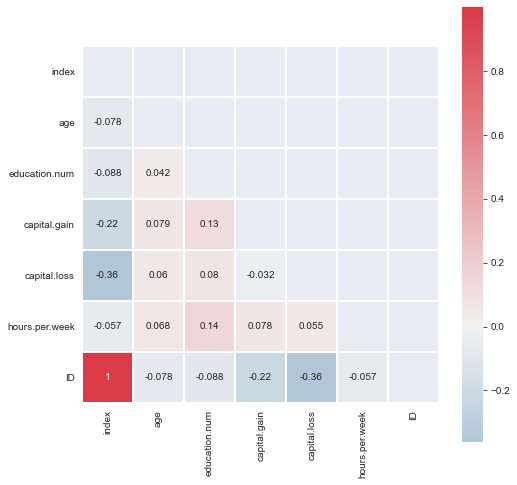

In [128]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

- Vemos que los mámis valores de correlación son negativos y de 0.4 pero se dan con el "index" por lo que no tiene sentido eliminarlos

## Age

Edad de cada persona

In [129]:
# ANALIZAMOS TODOS LOS VALORES QUE TOMA ESTA VARIABLE

df.age.unique()

array([30, 37, 41, 45, 28, 32, 31, 59, 57, 42, 54, 26, 49, 66, 44, 39, 20,
       24, 62, 29, 64, 58, 47, 23, 22, 51, 55, 40, 61, 69, 60, 33, 36, 56,
       72, 21, 74, 67, 48, 68, 63, 25, 18, 19, 52, 34, 50, 35, 17, 82, 43,
       27, 38, 84, 46, 90, 53, 71, 70, 76, 65, 73, 80, 75, 77, 79, 78, 81,
       85, 88, 83, 87, 86], dtype=int64)

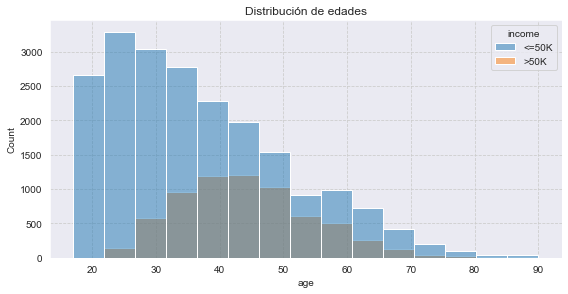

In [130]:
plt.figure(figsize=(8,4))
sns.histplot(x=df['age'],hue=df['income'],bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Distribución de edades')
plt.show()

- Del gráfico podemos ver que en el grupo de edad 0-20 no hay ningún ingreso de salario mayor a 50k, lo mismo ocurre con el grupo mayor a 75 años.

- Hacemos un diagrama de caja para analizar si hay outliers

<AxesSubplot:xlabel='age'>

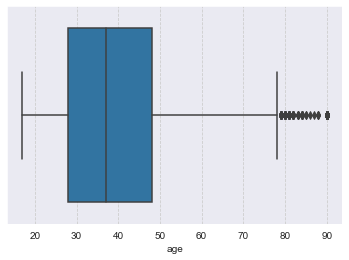

In [131]:
sns.boxplot(df.age)

In [132]:
df.age.describe()

count    27656.000000
mean        38.610356
std         13.659928
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [133]:
df.age[df.age>80].value_counts().sum()

87

- Como los outliers son solo 87 datos, procedemos a descartar todos los valores que estan fuera del bigote derecho (outliers)

In [134]:
df.drop(df[df['age']>80].index,inplace=True)
df.shape

(27569, 16)

## Work Class

Valores que toma la variable "workclass": Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

Es una variable categorica que deberemos convertir a numérica

- ANALIZAMOS TODOS LOS VALORES QUE TOMA ESTA VARIABLE


In [135]:
df.workclass.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', '?',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

- Vemos que hay una categoría que no está definida: **"?"**. Procedemos a contarlos

In [136]:
df.workclass[df.workclass=='?'].value_counts().sum()

1519

- Podemos ver que hay valores de Clase de trabajo definidos como **" ? "** que parece ser datos de error. Como es muy inferior, simplemente eliminaré estos registros. Además, los dos valores **Sin pago** y **Nunca trabajado** son insignificantes y, por lo tanto, es seguro descartarlos también.

In [137]:
df.drop(df[df['workclass']=='?'].index,inplace=True)
df.shape

(26050, 16)

In [138]:
df.drop(df[df['workclass']=='Never-worked'].index,inplace=True)
df.drop(df[df['workclass']=='Without-pay'].index,inplace=True)
df.shape

(26029, 16)

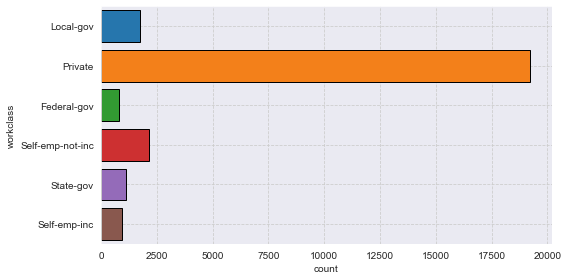

In [139]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['workclass'], saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

- Visualizamos la clase trabajadora en funcón del ingreso "Income"

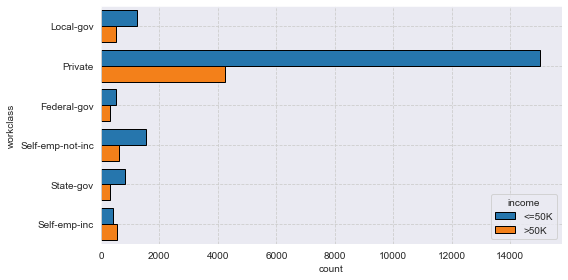

In [140]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['workclass'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

La mayoría de los individuos trabajan en el sector privado. Las probabilidades de ganar más de 50,000 son similares entre las clases de trabajo, excepto para los autónomos y el gobierno federal.

Para poder procesar esta información en un futuro aplicamos un **"getdummies"**


In [141]:
pd.get_dummies(df.workclass)

dummies = pd.get_dummies(df.workclass) # Obtenemos dummies
df = pd.concat([df, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df = df.drop('workclass', axis=1)
#df = df.drop('elf-emp-not-inc', axis=1)

df.head()

,index,age,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,hours.per.week,native.country,income,ID,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
0,24466,30,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,...,32,United-States,<=50K,24451,0,1,0,0,0,0
1,985,37,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,40,United-States,>50K,985,0,0,1,0,0,0
2,30250,41,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,...,60,United-States,>50K,30229,0,0,1,0,0,0
3,7107,45,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,...,60,United-States,>50K,7107,0,0,1,0,0,0
4,27656,28,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,...,40,United-States,<=50K,27639,0,0,1,0,0,0


## Education

La variable **"education"** toma los siguinetes valore: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

La variable **"education.num"** está asociada a la variable **"education"** y representa la cantidad de años que el sujeto ha estudiado. Por lo que para alimentar nuestro modelo usaremos **"education.num"** que es un "label encoder de **"education"**

Analizamos si hay valores "extraños":

In [142]:
df.education.unique()

array(['HS-grad', 'Bachelors', 'Some-college', '7th-8th', 'Assoc-voc',
       'Masters', 'Assoc-acdm', '1st-4th', '5th-6th', 'Prof-school',
       '9th', '10th', '11th', '12th', 'Doctorate', 'Preschool'],
      dtype=object)

In [143]:
education_classes = df['education'].unique()
for edu_class in education_classes:
    print("Para {}, el número de educación es {}"
          .format(edu_class, df[df['education'] == edu_class]['education.num'].unique()))

Para HS-grad, el número de educación es [9]
Para Bachelors, el número de educación es [13]
Para Some-college, el número de educación es [10]
Para 7th-8th, el número de educación es [4]
Para Assoc-voc, el número de educación es [11]
Para Masters, el número de educación es [14]
Para Assoc-acdm, el número de educación es [12]
Para 1st-4th, el número de educación es [2]
Para 5th-6th, el número de educación es [3]
Para Prof-school, el número de educación es [15]
Para 9th, el número de educación es [5]
Para 10th, el número de educación es [6]
Para 11th, el número de educación es [7]
Para 12th, el número de educación es [8]
Para Doctorate, el número de educación es [16]
Para Preschool, el número de educación es [1]


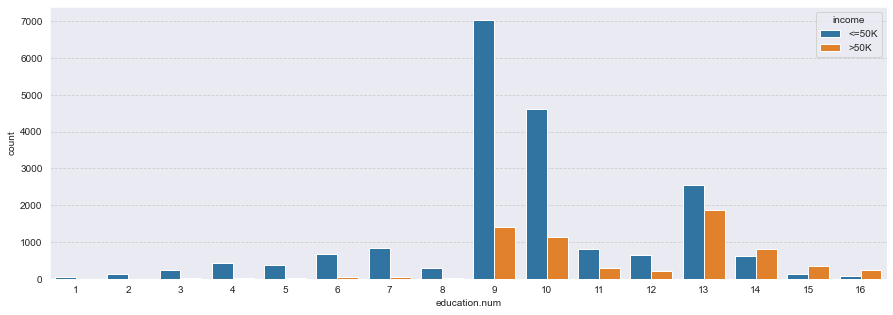

In [144]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'education.num',hue = 'income', data = df )
plt.show()


Para las personas que han completado su educación hasta el 12º, son pocos que ganan más de 50K dólares al año.

Para las personas que pertenecen a la categoría de HS-grad, Bachiller, Some-college en el nivel educativo, hay más personas que ganan más de 50K dólares al año.

La mayoría de las personas en el conjunto de datos tienen como máximo una educación secundaria, mientras que solo una pequeña parte tiene un doctorado. En su mayor parte, un mayor nivel de educación se correlaciona con un mayor porcentaje de personas con la etiqueta >50k.

- Procedemos a droppear "education"


In [145]:
df.drop(['education'],axis=1,inplace=True)

## Marital status

Esta variable toma los valores **"marital-status"**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

In [146]:
df['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

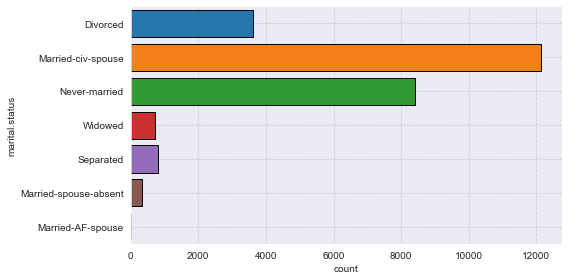

In [147]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['marital.status'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

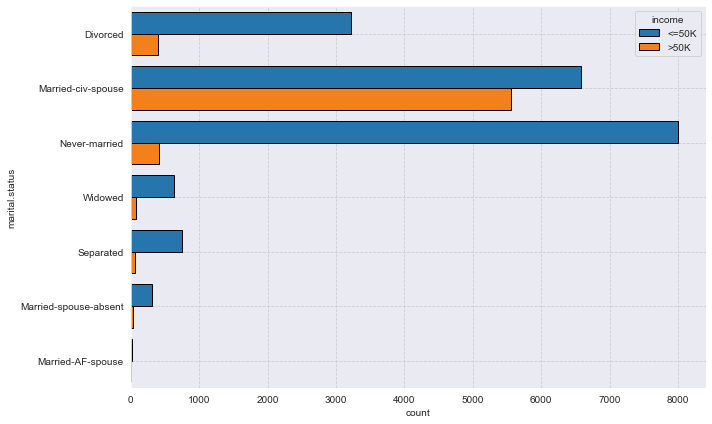

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital.status'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

En la clase Casado-civ-cónyuge hay más porcentaje de valores con más de 50k de salario. Podemos transformar esta variable en casado y soltero.

In [149]:
def married(val):
    if val=='Never-married':
        return 'not-married'
    elif val=='Divorced':
        return 'not-married'
    elif val=='Separated':
        return 'not-married'
    elif val=='Widowed':
        return 'not-married'
    else:
        return 'married'

In [150]:
df['marital.status']=df['marital.status'].apply(married)

In [151]:
df['marital.status'].unique()

array(['not-married', 'married'], dtype=object)

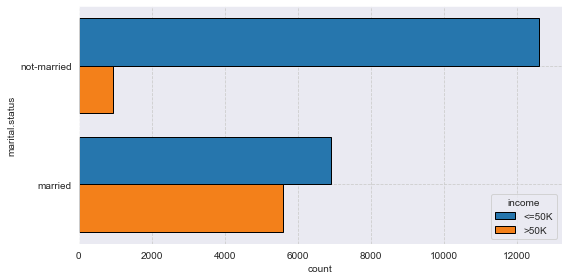

In [152]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['marital.status'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Podemos ver que si una persona está casada, la proporción de tener un salario de más de 50k es alta, y si no está casada, la proporción de tener un salario de más de 50k es baja.

Como tenemos 2 condiciones de "estado civil" procedemos a aplicar OneHotEncoder y droppear una de las columnas (Ya que son valores binarios)

In [153]:
pd.get_dummies(df['marital.status'])

dummies = pd.get_dummies(df['marital.status'])
df= pd.concat([df, dummies], axis=1) 

df = df.drop('marital.status', axis=1)


Como **"married"** es una variable binaria, procedemos a eliminar la columna **"not-married"** 

- 1 está casado

- 0 no está casado

In [154]:
df = df.drop('not-married', axis=1)

## Occupation

Esta variable puede tomar los siguientes valores **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Buscamos valores extraños:

In [155]:
df.occupation.unique()

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

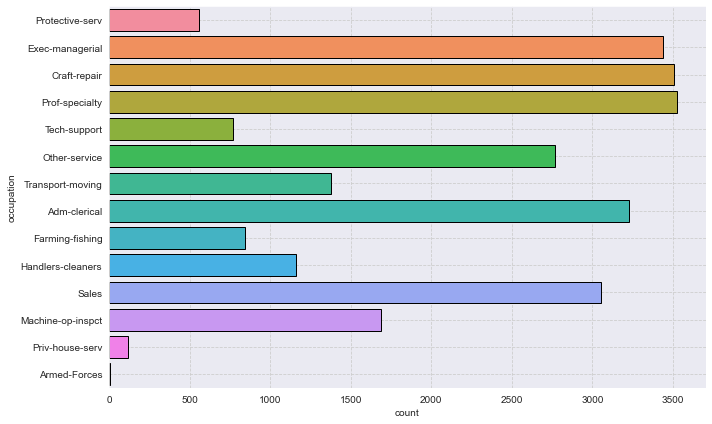

In [156]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

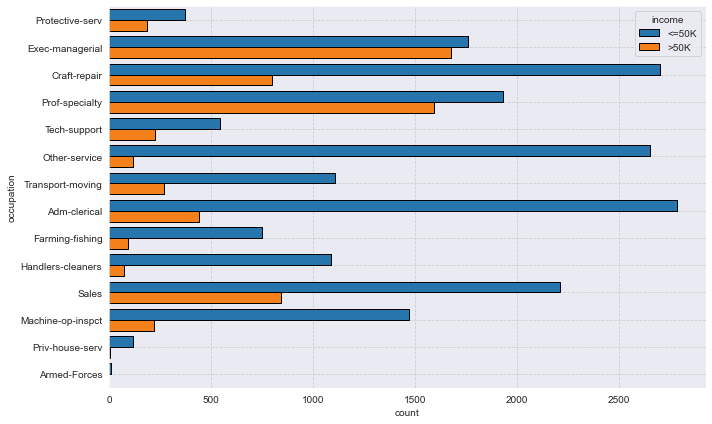

In [157]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [158]:
df[df.occupation=='Armed-Forces'].value_counts().sum()

7

In [159]:
df[df.occupation=='Priv-house-serv'].value_counts().sum()

119

In [160]:
df.drop(df[df['occupation']=='Armed-Forces'].index,inplace=True)
df.drop(df[df['occupation']=='Priv-house-serv'].index,inplace=True)
df.shape

(25903, 20)

Como se puede observar, hay una distribución un tanto uniforme de ocupaciones en el conjunto de datos, sin tener en cuenta la ausencia de las Fuerzas Armadas.

La especialidad ejecutiva y profesional se destaca por tener porcentajes muy altos de personas que ganan más de 50,000. Además, los porcentajes de Agricultura pesca, Otro servicio y Manipuladores de limpieza son significativamente inferiores al resto de la distribución.

- Para poder procesarlo necesitamos que las ocupaciones tomen variables numéricas. Aplicamos GetDummies

In [161]:
pd.get_dummies(df.occupation)

dummies = pd.get_dummies(df.occupation)

df = pd.concat([df, dummies], axis=1) 

df.head(3)

,index,age,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,...,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,24466,30,9,Protective-serv,Own-child,White,Female,0,0,32,...,0,0,0,0,0,0,1,0,0,0
1,985,37,13,Exec-managerial,Wife,White,Female,0,1848,40,...,1,0,0,0,0,0,0,0,0,0
2,30250,41,9,Craft-repair,Husband,White,Male,0,0,60,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df = df.drop('occupation', axis=1)
df.head(3)

,index,age,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,...,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,24466,30,9,Own-child,White,Female,0,0,32,United-States,...,0,0,0,0,0,0,1,0,0,0
1,985,37,13,Wife,White,Female,0,1848,40,United-States,...,1,0,0,0,0,0,0,0,0,0
2,30250,41,9,Husband,White,Male,0,0,60,United-States,...,0,0,0,0,0,0,0,0,0,0


## Relationship

Esta variable toma los siguientes valores 

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.


- Verificamos si hay valores extraños

In [163]:
df.relationship.unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

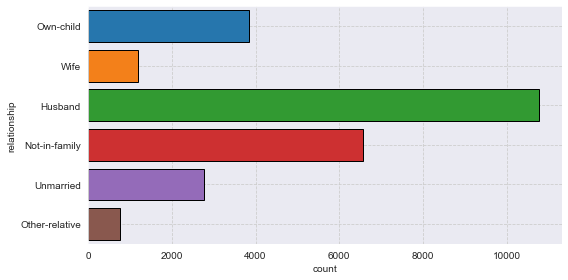

In [164]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['relationship'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

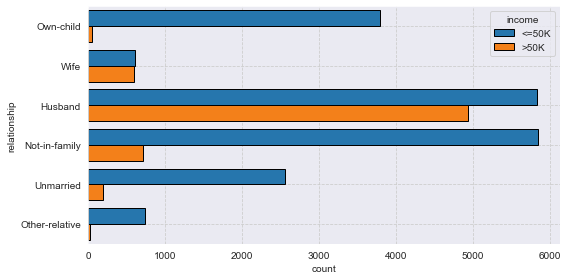

In [165]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['relationship'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Hay más porcentaje de valores de más de 50k en la clase Marido. Y menos en Otro-relativo. Esta característica proporciona la misma información que el estado civil.

- Procedemos a aplicar OneHotEncoder:

In [166]:
pd.get_dummies(df.relationship)

dummies = pd.get_dummies(df.relationship) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('relationship', axis=1)

## Race

La variable indica la raza del sujeto de estudio

- Analizamos si hay valores extraños

In [167]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

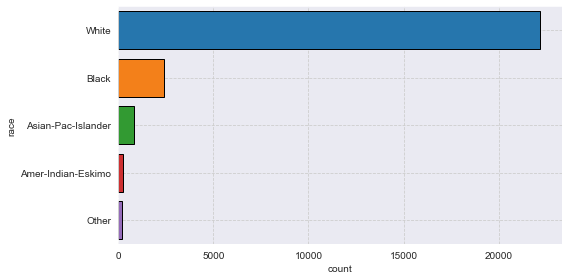

In [168]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['race'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

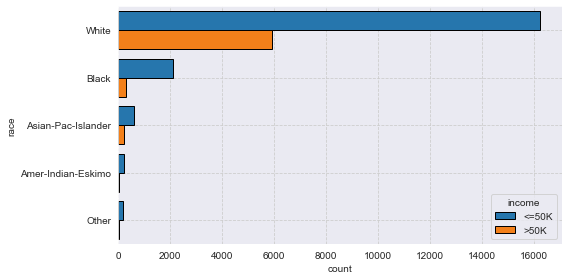

In [169]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['race'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Parece que la característica podría ser útil en nuestro modelo de predicción, ya que los blancos y los asiáticos tienen un mayor porcentaje de entradas de más de 50.000 que el resto de las razas. Sin embargo, el tamaño de la muestra de los blancos en el conjunto de datos es desproporcionadamente grande en comparación con todas las demás razas. 


In [170]:
df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)

- Procedemos a aplicar OneHotEncoder para representar este feature

In [171]:
pd.get_dummies(df.race)

dummies = pd.get_dummies(df.race) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('race', axis=1)

## Sex

Esta variable indica el sexo del sujeto

- Analizamos si hay valores extraños:

In [172]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

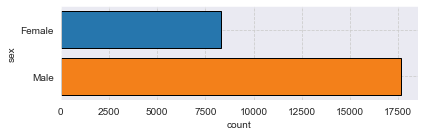

In [173]:
plt.figure(figsize=(6,2))
sns.countplot(y=df['sex'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

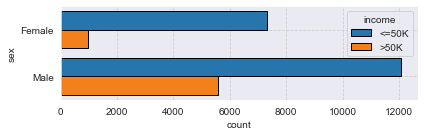

In [174]:
plt.figure(figsize=(6,2))
sns.countplot(y=df['sex'],hue=df['income'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

El porcentaje de hombres que ganan más de 50.000 es mucho mayor que el porcentaje de mujeres que ganan la misma cantidad. Esto sin duda será un factor significativo y debería ser una característica considerada en nuestro modelo de predicción.

- Procedemos a aplicar OneHotEncoder para representar este feature

In [175]:
pd.get_dummies(df.sex)

dummies = pd.get_dummies(df.sex) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('sex', axis=1)

In [176]:
df = df.drop('Male', axis=1)

## Capital gain

Capital ganado. Esta variable toma valores definidos, podemos interpretar que está agrupada en rangos.

- Analizamos valores extraños:

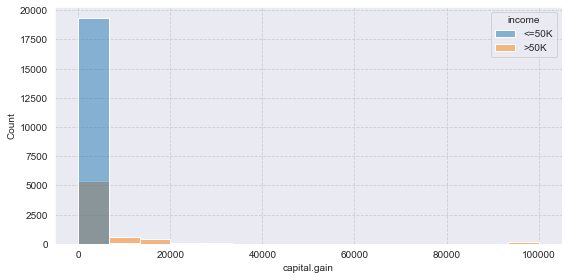

In [177]:
plt.figure(figsize=(8,4))
sns.histplot(x=df['capital.gain'],hue=df['income'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Del gráfico podemos ver que la distribución de la ganancia de capital está muy sesgada. Y hay valores atípicos en el punto de datos 100000.

## Capital loss

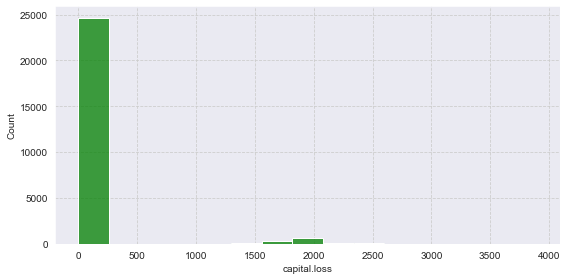

In [178]:
plt.figure(figsize=(8,4))
sns.histplot(df['capital.loss'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Del gráfico podemos ver que los datos no son simetricos.

## Capital flow

Como no tiene sentido considerar las ultimas 2 features de manera individual restamos **capital.loss** a **capital.gaing** y en resultado lo plasmamos en **"capital-flow"**

In [179]:
df['capital-flow'] = df['capital.gain'] - df['capital.loss']
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='capital-flow', ylabel='count'>

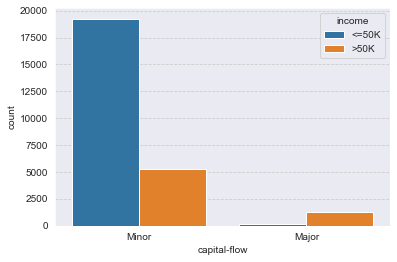

In [180]:
df['capital-flow'] = pd.cut(df['capital-flow'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'capital-flow', hue = 'income', data = df)

Se puede ver que para "Menor" hay más personas con Ingresos menores a $ 50K y para "Mayor"  hay más personas con ingresos mayores a $ 50K.

Esto está completamente de acuerdo con el hecho de que las personas que tienen una gran ganancia de capital en comparación con la pérdida de capital tienen ingresos de más de $ 50K.

Aplicamos GET DUMMIES PARA ESTOS NUEVOS RESULTADOS:

In [181]:
pd.get_dummies(df['capital-flow'])

dummies = pd.get_dummies(df['capital-flow']) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('capital-flow', axis=1)

df.head(3)

,index,age,education.num,hours.per.week,native.country,income,ID,Federal-gov,Local-gov,Private,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Other,White,Female,Minor,Major
0,24466,30,9,32,United-States,<=50K,24451,0,1,0,...,0,0,1,0,0,0,1,1,1,0
1,985,37,13,40,United-States,>50K,985,0,0,1,...,0,0,0,0,1,0,1,1,1,0
2,30250,41,9,60,United-States,>50K,30229,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## Hours per week	

Es una variable numérica. Analizamos si hay valores extraños:

In [182]:
df['hours.per.week'].unique()

array([32, 40, 60, 50, 45, 35, 49, 20, 25, 18, 22, 10, 48, 74, 30,  7, 37,
       36, 65, 44, 24, 70, 15, 99,  2, 52, 38,  5, 12, 42, 80, 56, 51, 77,
       47, 55,  4, 21, 16,  8, 46, 53, 82, 57, 62, 17, 84, 75, 64, 41, 58,
       23, 28, 43, 33, 66, 26, 29, 14, 34, 61,  3, 39,  9, 27, 72, 78, 85,
       11, 54, 98, 59, 19, 90,  1, 96, 92,  6, 91, 68, 63, 31, 13, 67, 88,
       76, 86, 97, 89, 81, 87, 94, 95, 73], dtype=int64)

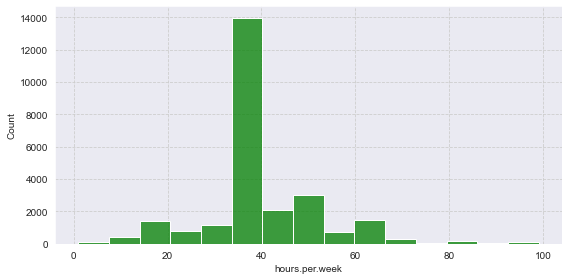

In [183]:
plt.figure(figsize=(8,4))
sns.histplot(df['hours.per.week'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Podemos ver que la gran mayoría de los valores son de 40 horas. lo que podemos hacer es hacer 3 clases, es decir <40hrs, 40hrs y >40hrs, y comprobar si es significativo o no.

In [184]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

In [185]:
df['hours.per.week']=df['hours.per.week'].apply(hrs_edit)

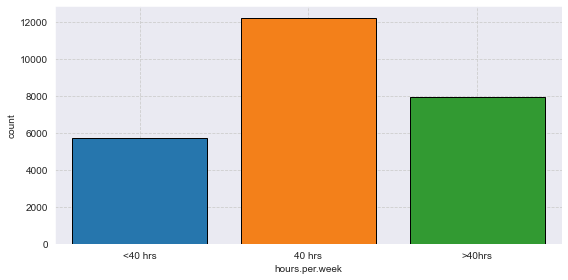

In [186]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['hours.per.week'],saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.show()

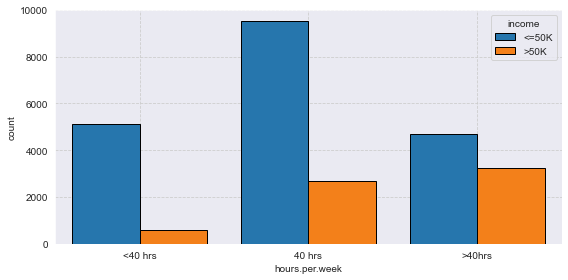

In [187]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['hours.per.week'],hue=df['income'], saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.show()

El porcentaje de personas que ganan más de 50.000 disminuye drásticamente cuando trabaja menos de 40 horas por semana y aumenta significativamente cuando trabaja más de 40 horas por semana.

Aplicamos un label encoding:

1 --> Menos de 40 horas

2--> 40 horas

3 --> Más de 40 horas

In [188]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['hour_label_encoded'] = le.fit_transform(df['hours.per.week'])

In [189]:
mapping_dict = {
    '<40 hrs': 1,
    '40 hrs': 2,
    '>40hrs': 3  
}

hour_ordinal = df['hours.per.week'].replace(mapping_dict)

In [190]:
df['Hour_ordinal'] = hour_ordinal
df.head(2)


,index,age,education.num,hours.per.week,native.country,income,ID,Federal-gov,Local-gov,Private,...,Own-child,Unmarried,Wife,Other,White,Female,Minor,Major,hour_label_encoded,Hour_ordinal
0,24466,30,9,<40 hrs,United-States,<=50K,24451,0,1,0,...,1,0,0,0,1,1,1,0,1,1
1,985,37,13,40 hrs,United-States,>50K,985,0,0,1,...,0,0,1,0,1,1,1,0,0,2


In [191]:
df.drop(['hour_label_encoded','hours.per.week'],axis=1,inplace=True)

## Native country

Esta variable representa el país de origen del sujeto analizado.

Se verifican si hay valores extraños:

In [192]:
df['native.country'].unique()

array(['United-States', '?', 'Jamaica', 'India', 'Mexico', 'Philippines',
       'Dominican-Republic', 'El-Salvador', 'China', 'Thailand',
       'Ireland', 'Laos', 'Iran', 'France', 'Guatemala', 'South',
       'Puerto-Rico', 'Japan', 'Portugal', 'Greece', 'Canada', 'Poland',
       'Peru', 'Cuba', 'Columbia', 'Germany', 'Italy', 'Hong', 'Haiti',
       'Ecuador', 'England', 'Nicaragua', 'Cambodia', 'Trinadad&Tobago',
       'Vietnam', 'Honduras', 'Taiwan', 'Scotland', 'Yugoslavia',
       'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

- Droppeamos las filas cuyo país sea el símbolo **"?"**

In [193]:
df= df.drop(df[df['native.country'] == ' ?'].index)

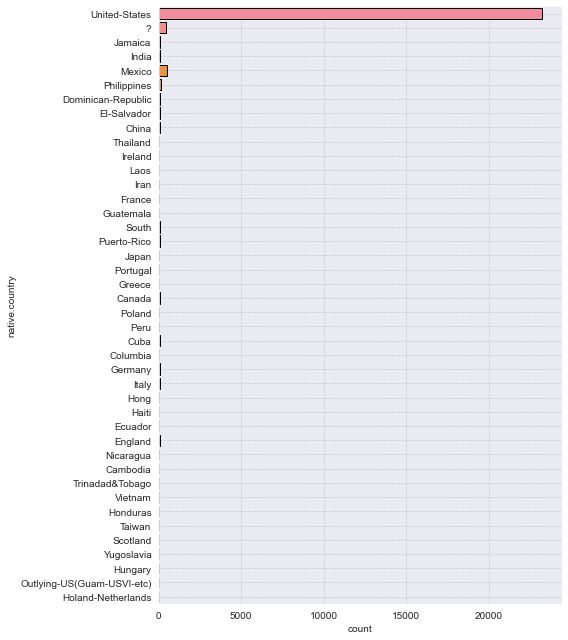

In [194]:
plt.figure(figsize=(8,9))
sns.countplot(y=df['native.country'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

- Agrupamos las nacionalidades como "USA" y "resto de paises"

In [195]:
countries = np.array(df['native.country'].unique())
countries = np.delete(countries, 0)
df['native.country'].replace(countries, 'Other', inplace = True)

Ahora aplicamos OneHotEncoder para representar esta variable categórica y finalmente droppeamos la columna de "Otros paises".

1--> Es norteamericano

0 --> No es norteamericano

In [196]:
pd.get_dummies(df['native.country'])

dummies = pd.get_dummies(df['native.country']) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('native.country', axis=1)
df.head(1)

,index,age,education.num,income,ID,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Unmarried,Wife,Other,White,Female,Minor,Major,Hour_ordinal,Other,United-States
0,24466,30,9,<=50K,24451,0,1,0,0,0,...,0,0,0,1,1,1,0,1,0,1


In [197]:
df = df.drop('Other', axis=1)

## Income:

Procedemos a hacer OneHotEncoder con esta columna.

Analisamos valores extraños:

In [198]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [199]:
pd.get_dummies(df.income)

dummies = pd.get_dummies(df.income) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('income', axis=1)

df.head(1)

,index,age,education.num,ID,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Unmarried,Wife,White,Female,Minor,Major,Hour_ordinal,United-States,<=50K,>50K
0,24466,30,9,24451,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,0


In [200]:
df = df.drop('>50K', axis=1)

In [201]:
df.head()

,index,age,education.num,ID,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Own-child,Unmarried,Wife,White,Female,Minor,Major,Hour_ordinal,United-States,<=50K
0,24466,30,9,24451,0,1,0,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1,985,37,13,985,0,0,1,0,0,0,...,0,0,1,1,1,1,0,2,1,0
2,30250,41,9,30229,0,0,1,0,0,0,...,0,0,0,1,0,1,0,3,1,0
3,7107,45,13,7107,0,0,1,0,0,0,...,0,0,0,1,0,1,0,3,1,0
4,27656,28,9,27639,0,0,1,0,0,0,...,0,0,0,1,1,1,0,2,1,1


In [202]:
df.columns

Index(['index', 'age', 'education.num', 'ID', 'Federal-gov', 'Local-gov',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'married',
       'Adm-clerical', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Husband', 'Not-in-family', 'Other-relative',
       'Own-child', 'Unmarried', 'Wife', 'White', 'Female', 'Minor', 'Major',
       'Hour_ordinal', 'United-States', '<=50K'],
      dtype='object')

In [203]:
df.dtypes

index                int64
age                  int64
education.num        int64
ID                   int64
Federal-gov          uint8
Local-gov            uint8
Private              uint8
Self-emp-inc         uint8
Self-emp-not-inc     uint8
State-gov            uint8
married              uint8
Adm-clerical         uint8
Craft-repair         uint8
Exec-managerial      uint8
Farming-fishing      uint8
Handlers-cleaners    uint8
Machine-op-inspct    uint8
Other-service        uint8
Prof-specialty       uint8
Protective-serv      uint8
Sales                uint8
Tech-support         uint8
Transport-moving     uint8
Husband              uint8
Not-in-family        uint8
Other-relative       uint8
Own-child            uint8
Unmarried            uint8
Wife                 uint8
White                uint8
Female               uint8
Minor                uint8
Major                uint8
Hour_ordinal         int64
United-States        uint8
<=50K                uint8
dtype: object

In [204]:
df=df.reset_index()

# Model fitting

- Armamos los sets de entrenamiento y prueba

In [205]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [206]:
# GENERAMOS EL DF DE FEATURES Y EL DE TARGET

X = df.drop('<=50K', axis=1)

y = df['<=50K'] 

In [207]:
# GENERAMOS LOS SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [208]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19427, 36), (6476, 36), (19427,), (6476,))

## Decision Tree

In [209]:
model= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [210]:
model.score(X_test,y_test)

0.8001852995676343

In [211]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [212]:
accuracy_score(y_train, pred_train)

1.0

## Random Forest

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [214]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=145, random_state=40,criterion='entropy',max_depth=95)
model1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=95, n_estimators=145,
                       random_state=40)

In [215]:
model1.score(X_test,y_test)

0.8567016676961087

In [216]:
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

In [217]:
accuracy_score(y_train, pred_train)

1.0

## KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [219]:
model.score(X_test,y_test)

0.8407967881408277

In [220]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [221]:
accuracy_score(y_train, pred_train)

0.8503114222473876

## KNN

Con otra ponderación

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

- Escalando los datos obtenemos una mejora en el model score de 4%

In [223]:
model = KNeighborsClassifier(n_neighbors=23, weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23, weights='distance')

In [224]:
model.score(X_test,y_test)

0.839715873996294

In [225]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [226]:
accuracy_score(y_train, pred_train)

1.0

In [227]:
pred_train.shape , pred_test.shape

((19427,), (6476,))

**Random Forest es el mejor modelo con 85% de accuracy.**

### Seleccionamos "Ramdon forest" para predecir sobre el df "test"

In [228]:
url_test = "https://raw.githubusercontent.com/EvDelacost/income/main/test.csv"
df = pd.read_csv(url_test)
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198


In [229]:
df.shape

(4881, 15)

In [230]:
df.drop(df[df['age']>80].index,inplace=True)

df.drop(df[df['workclass']=='?'].index,inplace=True)

df.drop(df[df['workclass']=='Never-worked'].index,inplace=True)
df.drop(df[df['workclass']=='Without-pay'].index,inplace=True)

pd.get_dummies(df.workclass)

dummies = pd.get_dummies(df.workclass)
df = pd.concat([df, dummies], axis=1)
df = df.drop('workclass', axis=1)

df.drop(['education'],axis=1,inplace=True)

df['marital.status']=df['marital.status'].apply(married)


pd.get_dummies(df['marital.status'])

dummies = pd.get_dummies(df['marital.status'])
df= pd.concat([df, dummies], axis=1) 

df = df.drop('marital.status', axis=1)


df = df.drop('not-married', axis=1)

df.drop(df[df['occupation']=='Armed-Forces'].index,inplace=True)
df.drop(df[df['occupation']=='Priv-house-serv'].index,inplace=True)

pd.get_dummies(df.occupation)

dummies = pd.get_dummies(df.occupation)

df = pd.concat([df, dummies], axis=1) 
df = df.drop('occupation', axis=1)

pd.get_dummies(df.relationship)

dummies = pd.get_dummies(df.relationship) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('relationship', axis=1)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)

pd.get_dummies(df.race)

dummies = pd.get_dummies(df.race) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('race', axis=1)

pd.get_dummies(df.sex)

dummies = pd.get_dummies(df.sex) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('sex', axis=1)

df = df.drop('Male', axis=1)


df['capital-flow'] = df['capital.gain'] - df['capital.loss']
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)


df['capital-flow'] = pd.cut(df['capital-flow'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])


pd.get_dummies(df['capital-flow'])

dummies = pd.get_dummies(df['capital-flow']) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('capital-flow', axis=1)



df['hours.per.week']=df['hours.per.week'].apply(hrs_edit)



le = preprocessing.LabelEncoder()
df['hour_label_encoded'] = le.fit_transform(df['hours.per.week'])

hour_ordinal = df['hours.per.week'].replace(mapping_dict)

df['Hour_ordinal'] = hour_ordinal


df.drop(['hour_label_encoded','hours.per.week'],axis=1,inplace=True)

df= df.drop(df[df['native.country'] == ' ?'].index)

countries = np.array(df['native.country'].unique())
countries = np.delete(countries, 0)
df['native.country'].replace(countries, 'Other', inplace = True)


pd.get_dummies(df['native.country'])

dummies = pd.get_dummies(df['native.country']) 
df= pd.concat([df, dummies], axis=1) 
df = df.drop('native.country', axis=1)

df.drop(['Other'],axis=1,inplace=True)
df=df.reset_index(drop=True)
df

,index,age,education.num,ID,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Other-relative,Own-child,Unmarried,Wife,White,Female,Minor,Major,Hour_ordinal,United-States
0,3643,53,10,3643,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,2,1
1,9403,42,10,9401,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,1,1
2,17909,49,16,17903,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,3,1
3,5198,58,13,5198,0,1,0,0,0,0,...,0,0,0,1,1,1,1,0,2,1
4,28783,42,11,28766,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,19475,50,9,19468,0,0,1,0,0,0,...,0,0,1,0,1,1,1,0,2,1
4542,7554,43,13,7554,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,2,1
4543,25091,71,11,25076,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,2,1
4544,9733,20,10,9731,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,2,0


- Predecimos sobre el DF de test

In [112]:
a=df['ID']

In [113]:
a=pd.DataFrame(a,columns = ["ID"])
a

,ID
0,3643
1,9401
2,17903
3,5198
4,28766
...,...
4541,19468
4542,7554
4543,25076
4544,9731


In [114]:
income = model1.predict(df)

In [115]:
print(income)

[1 1 1 ... 1 1 1]


In [116]:
y=pd.DataFrame(income,columns = ["income"])
y

,income
0,1
1,1
2,1
3,1
4,1
...,...
4541,1
4542,1
4543,1
4544,1


In [117]:
y.isnull().sum()

income    0
dtype: int64

### CONCATENAR

Para resentear el index en los DF al momento de concatenar tenemos que resetear el index, sino hay diferencia de indices y se genera NaN

**pd.concat(X.reset_index(drop=True))**

In [118]:
test = pd.concat([a,y], axis=1, )
test

,ID,income
0,3643,1
1,9401,1
2,17903,1
3,5198,1
4,28766,1
...,...,...
4541,19468,1
4542,7554,1
4543,25076,1
4544,9731,1


In [119]:
test.info

<bound method DataFrame.info of          ID  income
0      3643       1
1      9401       1
2     17903       1
3      5198       1
4     28766       1
...     ...     ...
4541  19468       1
4542   7554       1
4543  25076       1
4544   9731       1
4545  25258       1

[4546 rows x 2 columns]>

In [120]:
test.isna().sum()

ID        0
income    0
dtype: int64

In [121]:
y.to_csv("y.cvs")

 ### MÉTRICAS de CLASIFICACIÓN
 
 Aplicadas al set del modelo "Ramdon forest"

In [122]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_test)

array([[1008,  624],
       [ 414, 4430]], dtype=int64)

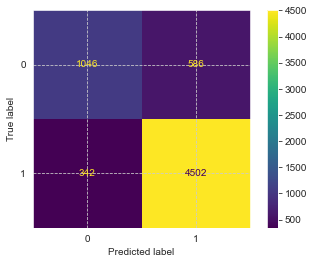

In [123]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model1, X_test, y_test)
plt.show()


In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1632
           1       0.88      0.91      0.90      4844

    accuracy                           0.84      6476
   macro avg       0.79      0.77      0.78      6476
weighted avg       0.83      0.84      0.84      6476



RECORDAR QUE EL PREPROCESAMIENTO SE HACE SOBRE EL **X**_TEST Y **X**_TRAIN, NO SOBRE EL DF COMPLETO. Y LA PARTE **y** NO SE TOCA

### Métricas de clasificación para ramdom forest: como es un modelo de clasificacion vamos a aplicarle de manera iterativa una metrica de clasificación F1 scrore y lo graficaremos


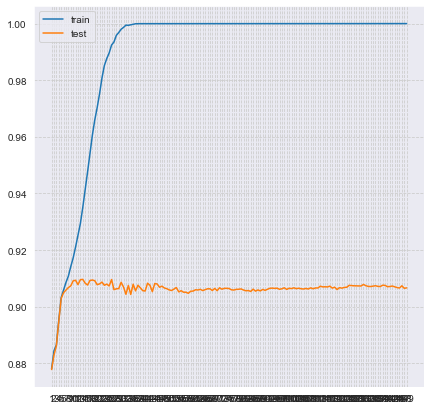

In [128]:
from sklearn.metrics import f1_score


train_fscores = []
test_fscores = []
max_depths = np.arange(1, 150)


for i in max_depths:
  model = RandomForestClassifier(n_estimators=i+50, random_state=40,criterion='entropy',max_depth=i)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  train_fscores.append(f1_score(y_train, train_preds))
  test_fscores.append(f1_score(y_test, test_preds))
    
    
plt.figure(figsize=(7,7))

plt.plot(max_depths, train_fscores, label="train")
plt.plot(max_depths, test_fscores,  label="test")
plt.xticks(max_depths)
plt.legend()
plt.show() 
    